In [7]:
# a. Data Preprocessing  
import pandas as p 
da=p.read_csv("matches.csv") 
da.info() 
 
#PRE_PROCESSING 
miss=da.isna().sum() 
print("\nMissing Values:\n",miss) 
 
da.drop('umpire3', axis=1, inplace=True) 
da.dropna(axis=0,inplace=True) 
da.drop('date',axis=1,inplace=True) 
 
print("\nMissing Values:\n",da.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               636 non-null    int64  
 1   season           636 non-null    int64  
 2   city             629 non-null    object 
 3   date             636 non-null    object 
 4   team1            636 non-null    object 
 5   team2            636 non-null    object 
 6   toss_winner      636 non-null    object 
 7   toss_decision    636 non-null    object 
 8   result           636 non-null    object 
 9   dl_applied       636 non-null    int64  
 10  winner           633 non-null    object 
 11  win_by_runs      636 non-null    int64  
 12  win_by_wickets   636 non-null    int64  
 13  player_of_match  633 non-null    object 
 14  venue            636 non-null    object 
 15  umpire1          635 non-null    object 
 16  umpire2          635 non-null    object 
 17  umpire3         

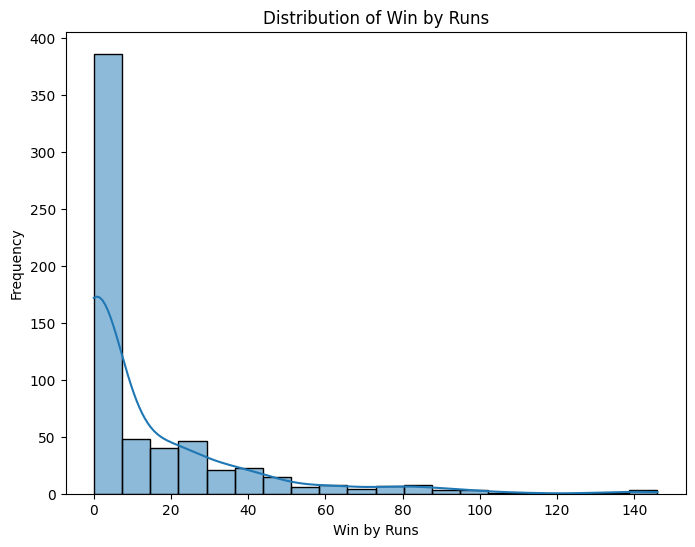

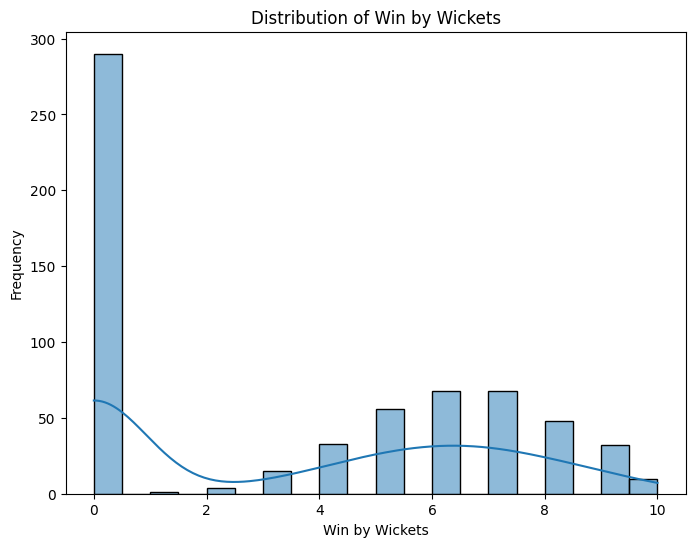

C:\Users\admin\AppData\Local\Temp\ipykernel_12200\569449282.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  s.countplot(x=x, data=da, palette='Set2')


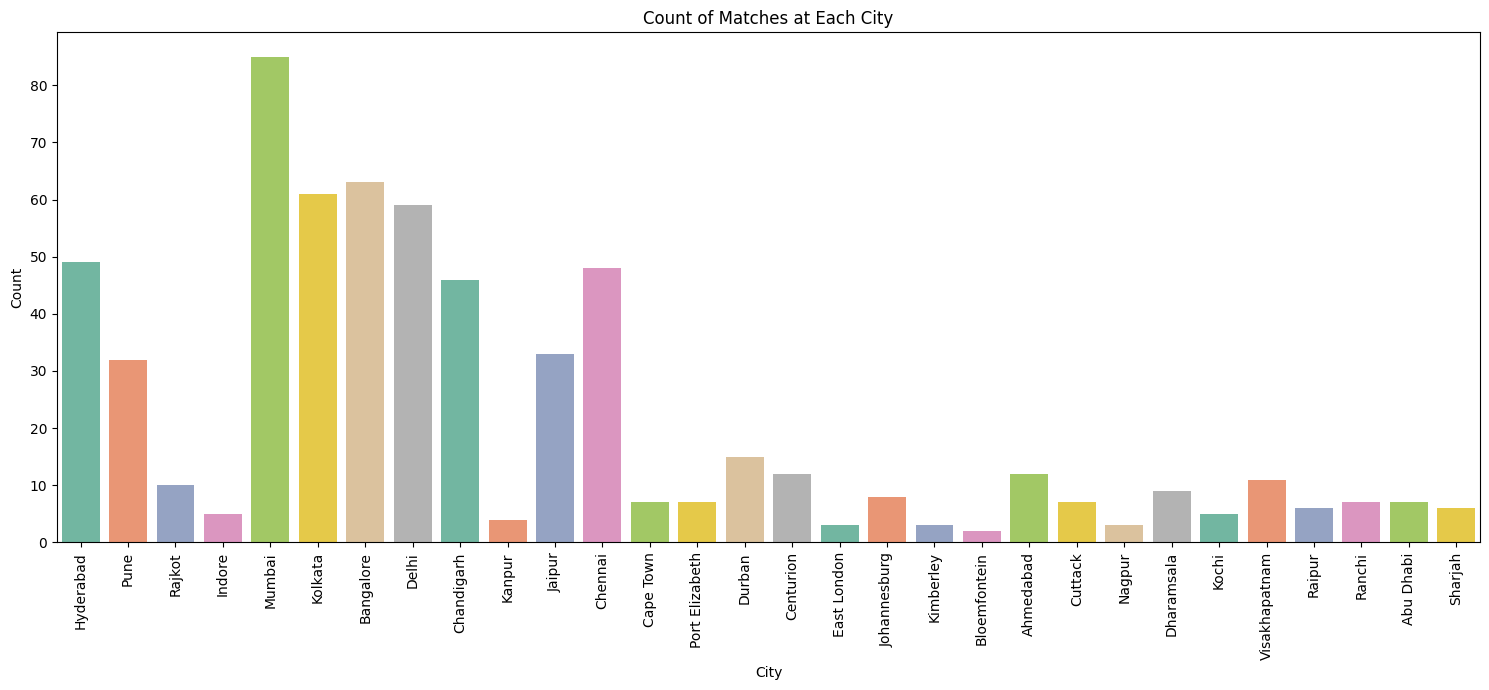

C:\Users\admin\AppData\Local\Temp\ipykernel_12200\569449282.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  s.countplot(x=x, data=da, palette='Set2')


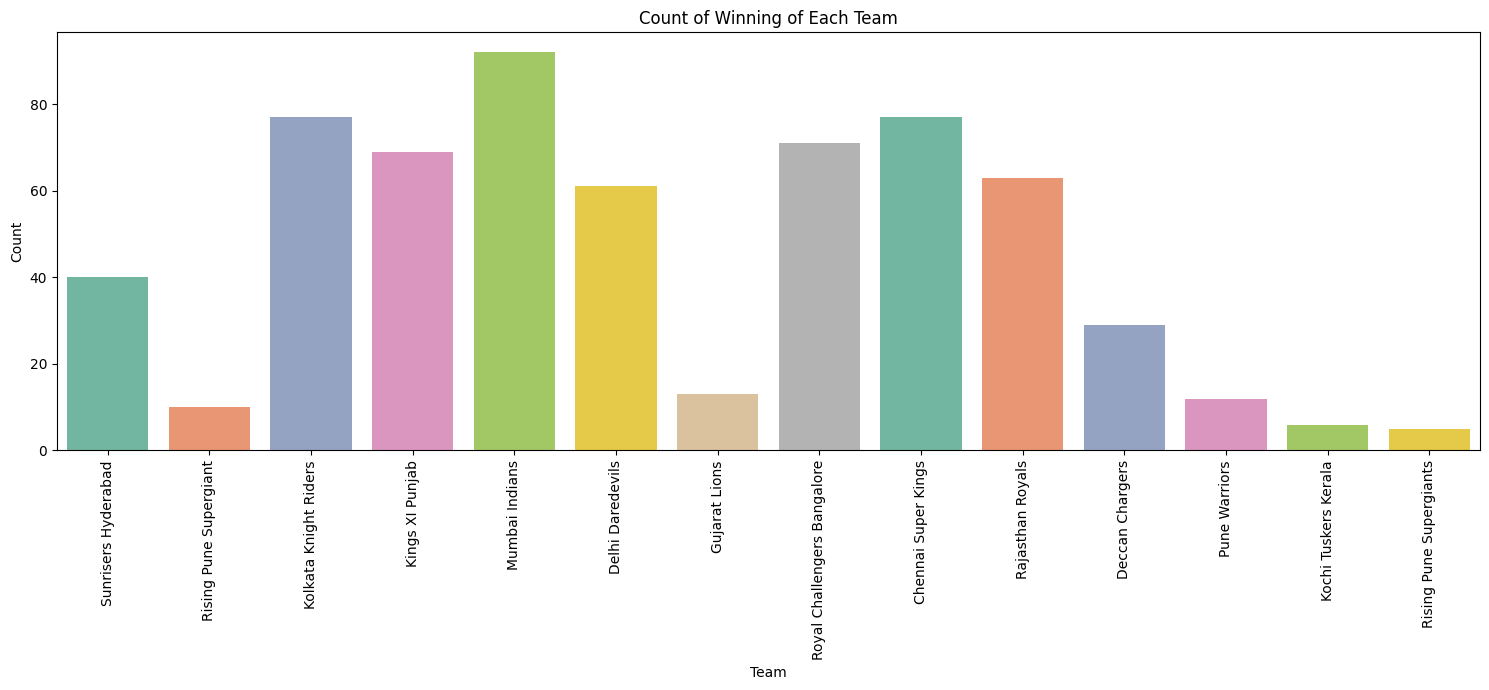

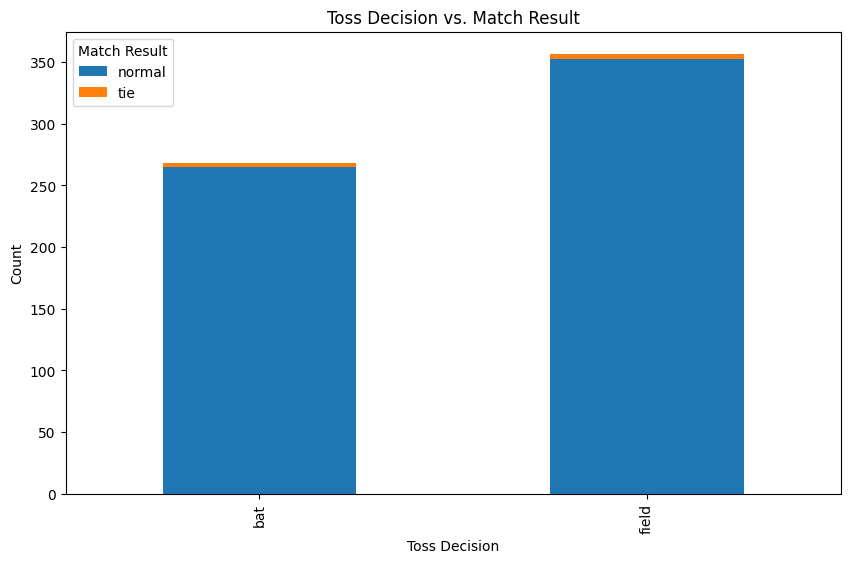

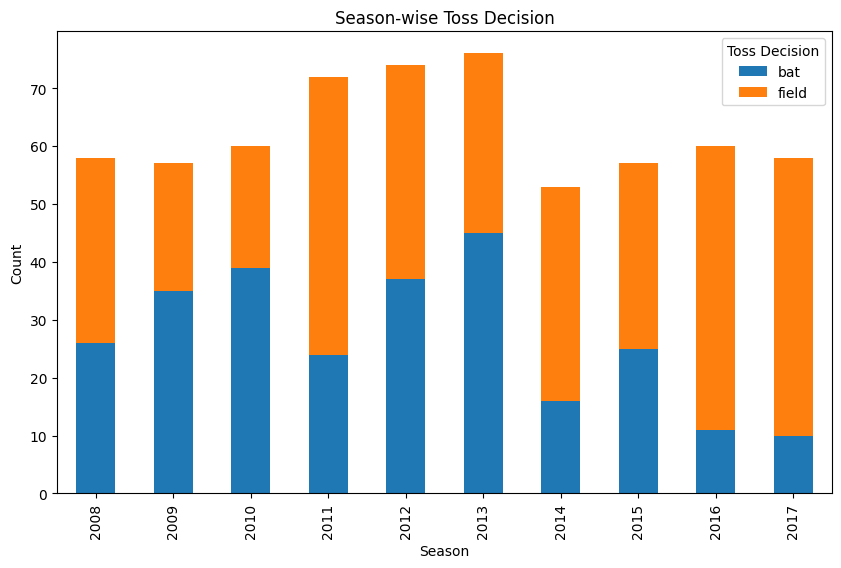

In [9]:
#b. Data Exploration 

import matplotlib.pyplot as m 
import seaborn as s 
 
# Function to create a histogram 
def histo(da, col, title, xlabel): 
    m.figure(figsize=(8, 6)) 
    s.histplot(da[col], bins=20, kde=True) 
    m.title(title) 
    m.xlabel(xlabel) 
    m.ylabel('Frequency') 
    m.show() 
 
# Function to create a count plot 
def count_plo(da, x, title, xlabel): 
    m.figure(figsize=(15, 7)) 
    s.countplot(x=x, data=da, palette='Set2') 
    m.title(title) 
    m.xlabel(xlabel) 
    m.ylabel('Count') 
    m.xticks(rotation=90) 
    m.tight_layout() 
    m.show() 
 
# Function to create a stacked bar chart 
def sta_bar(da, x, y, title, xlabel, ylabel, legend_title=None): 
    dp = da.groupby([x, y]).size().unstack() 
    dp.plot(kind='bar', stacked=True, figsize=(10, 6)) 
    m.title(title) 
    m.xlabel(xlabel) 
    m.ylabel(ylabel) 
    if legend_title: 
        m.legend(title=legend_title) 
    m.show() 
 
 
#DATA_EXPLORATION 
histo(da, 'win_by_runs', 'Distribution of Win by Runs', 'Win by Runs') 
histo(da, 'win_by_wickets', 'Distribution of Win by Wickets', 'Win by Wickets') 
count_plo(da, 'city', 'Count of Matches at Each City', 'City') 
count_plo(da, 'winner', 'Count of Winning of Each Team', 'Team') 
sta_bar(da, 'toss_decision', 'result', 'Toss Decision vs. Match Result', 'Toss Decision', 'Count', legend_title='Match Result') 
sta_bar(da, 'season', 'toss_decision', 'Season-wise Toss Decision', 'Season', 'Count', legend_title='Toss Decision')

In [9]:
#c. Splitting 
 
 
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split 
 
#Transformation 
categorical_columns = ['city', 'team1', 'team2', 'toss_winner', 
'toss_decision', 'result', 'player_of_match', 'venue', 'umpire1', 
'umpire2','winner','date'] 
label_encoders = {} 
 
for column in categorical_columns: 
    label_encoders[column] = LabelEncoder() 
    da[column] = label_encoders[column].fit_transform(da[column]) 
 
X = da.drop('winner', axis=1)   
y = da['winner'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
random_state=42) 
print("Train set:", X_train.shape, y_train.shape) 
print("Test set:", X_test.shape, y_test.shape)

Train set: (437, 16) (437,)
Test set: (188, 16) (188,)
